In [54]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
import sklearn.metrics
 
hr_original = pd.read_csv("HR_comma_sep.csv", header=0)

In [55]:
hr_original.info();
hr_original.dropna();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [56]:
hr_original.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


/home/mak/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


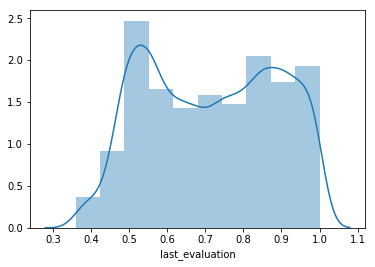

there are 7802 employees evaluated more than 0.7
there are 7197 employees evaluated less than 0.7


In [57]:
f,ax1 = plt.subplots(1,1)
sns.distplot(hr_original['last_evaluation'],bins=10,norm_hist=False)
plt.show()
print('there are {} employees evaluated more than 0.7'.format(len(hr_original[hr_original['last_evaluation']>0.7])))
print('there are {} employees evaluated less than 0.7'.format(len(hr_original[hr_original['last_evaluation']<=0.7])))

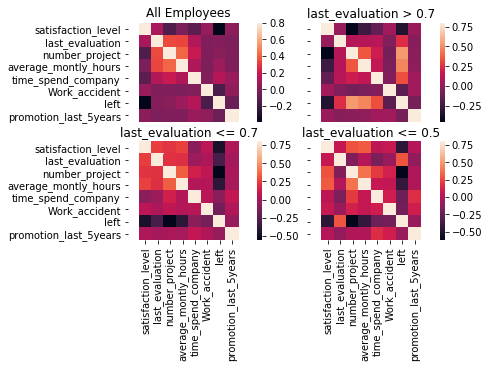

In [58]:
corrmat = hr_original.corr()
f, axarr = plt.subplots(2, 2, sharey=True)


sns.heatmap(corrmat, vmax=.8, square=True,ax=axarr[0,0])
axarr[0,0].set_title("All Employees")
axarr[0,0].xaxis.set_visible(False)


ge = hr_original[hr_original['last_evaluation']>=0.7]
gecorrmat = ge.corr()
axarr[0,1].xaxis.set_visible(False)
axarr[0,1].set_title("last_evaluation > 0.7")
sns.heatmap(gecorrmat, vmax=.8, square=True,ax=axarr[0,1])

be = hr_original[hr_original['last_evaluation']<=0.7]
becorrmat = be.corr()
sns.heatmap(becorrmat, vmax=.8, square=True,ax=axarr[1,0])
axarr[1,0].set_title("last_evaluation <= 0.7")

vbe = hr_original[hr_original['last_evaluation']<=0.5]
vbecorrmat = vbe.corr()
sns.heatmap(vbecorrmat, vmax=.8, square=True,ax=axarr[1,1])
axarr[1,1].set_title("last_evaluation <= 0.5")

plt.show()

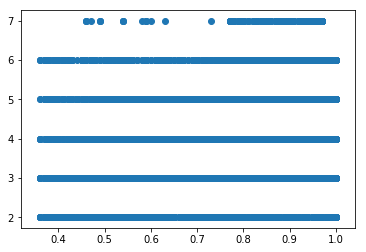

In [59]:
whle_df = hr_original[['last_evaluation','number_project']].copy()
f ,ax1 = plt.subplots(1,1)
ax1.scatter(hr_original['last_evaluation'],hr_original['number_project'])
plt.show()

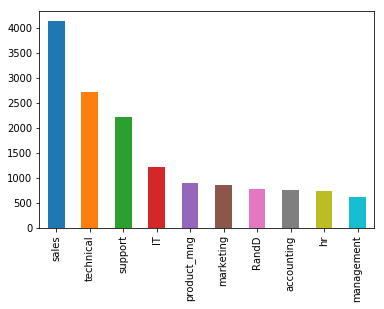

In [60]:
#Department Analysis
vc = hr_original['sales'].value_counts().plot(kind='bar')
plt.show()

In [61]:
sales = hr_original[hr_original['sales']=='sales']['number_project']
tec = hr_original[hr_original['sales']=='technical']['number_project']
support = hr_original[hr_original['sales']=='support']['number_project']
it = hr_original[hr_original['sales']=='IT']['number_project']
hr = hr_original[hr_original['sales']=='hr']['number_project']
product_mng = hr_original[hr_original['sales']=='product_mng']['number_project']

In [62]:
print('sales mean projects {0} with variance {1}'.format(sales.mean(),sales.std()))
print('technical mean projects {0} with variance {1}'.format(tec.mean(),tec.std()))
print('support mean projects {0} with variance {1}'.format(support.mean(),support.std()))
print('IT mean projects {0} with variance {1}'.format(it.mean(),it.std()))
print('HR mean projects {0} with variance {1}'.format(hr.mean(),hr.std()))   
print('product_mng mean projects {0} with variance {1}'.format(product_mng.mean(),product_mng.std()))


sales mean projects 3.776328502415459 with variance 1.242798068357808
technical mean projects 3.8779411764705882 with variance 1.2589475967402388
support mean projects 3.803947958725886 with variance 1.2120959150021104
IT mean projects 3.8166259168704157 with variance 1.2216577508086217
HR mean projects 3.654939106901218 with variance 1.2291675815125718
product_mng mean projects 3.8070953436807096 with variance 1.2440466843899665


/home/mak/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


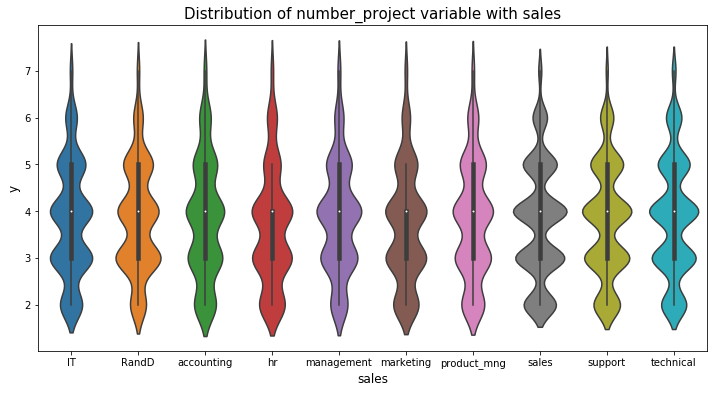

In [66]:
var_name = "sales"
col_order = np.sort(hr_original[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='number_project', data=hr_original, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of number_project variable with "+var_name, fontsize=15)
plt.show()

In [67]:
sales_eval = hr_original[hr_original['sales']=='sales']['last_evaluation']
tec_eval = hr_original[hr_original['sales']=='technical']['last_evaluation']
support_evl = hr_original[hr_original['sales']=='support']['last_evaluation']
it_eval = hr_original[hr_original['sales']=='IT']['last_evaluation']
hr_eval = hr_original[hr_original['sales']=='hr']['last_evaluation']

print('sales mean evaluation {0} with variance {1}'.format(sales_eval.mean(),sales_eval.std()))
print('technical mean evaluation {0} with variance {1}'.format(tec_eval.mean(),tec_eval.std()))
print('support mean evaluation {0} with variance {1}'.format(tec_eval.mean(),tec_eval.std()))
print('it mean evaluation {0} with variance {1}'.format(it_eval.mean(),it_eval.std()))
print('hr mean evaluation {0} with variance {1}'.format(hr_eval.mean(),hr_eval.std()))

sales mean evaluation 0.7097173913043466 with variance 0.17145932860167945
technical mean evaluation 0.7210992647058838 with variance 0.17336427600610105
support mean evaluation 0.7210992647058838 with variance 0.17336427600610105
it mean evaluation 0.716829665851672 with variance 0.16450818342711224
hr mean evaluation 0.7088497970230044 with variance 0.17458398995731736


/home/mak/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


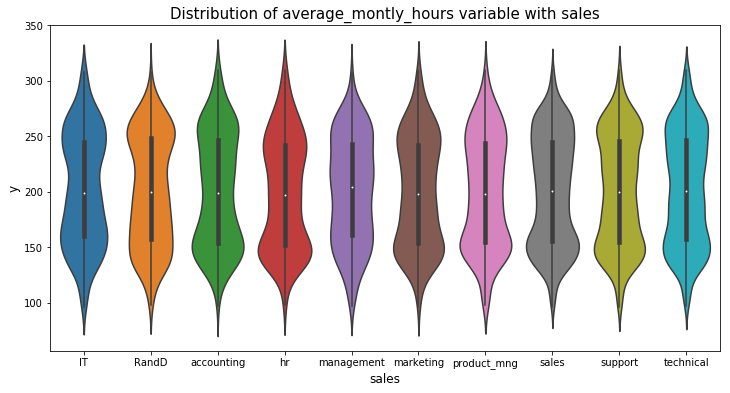

In [65]:
var_name = "sales"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='average_montly_hours', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of average_montly_hours variable with "+var_name, fontsize=15)
plt.show()

/home/mak/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


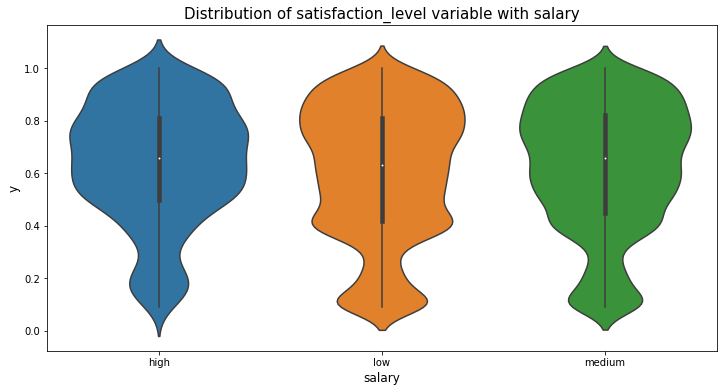

In [71]:
#Salary Analysis
var_name = "salary"
col_order = np.sort(hr_original[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='satisfaction_level', data=hr_original, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of satisfaction_level variable with "+var_name, fontsize=15)
plt.show()
#According to the chart there is not a strong relationship between salary and satisfaction.

/home/mak/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


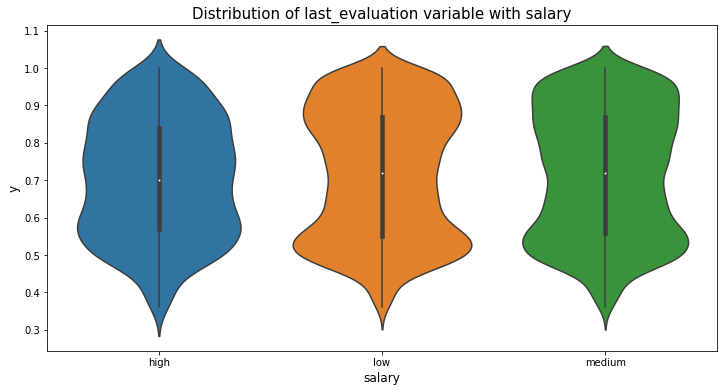

In [72]:
var_name = "salary"
col_order = np.sort(hr_original[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='last_evaluation', data=hr_original, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of last_evaluation variable with "+var_name, fontsize=15)
plt.show()

/home/mak/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


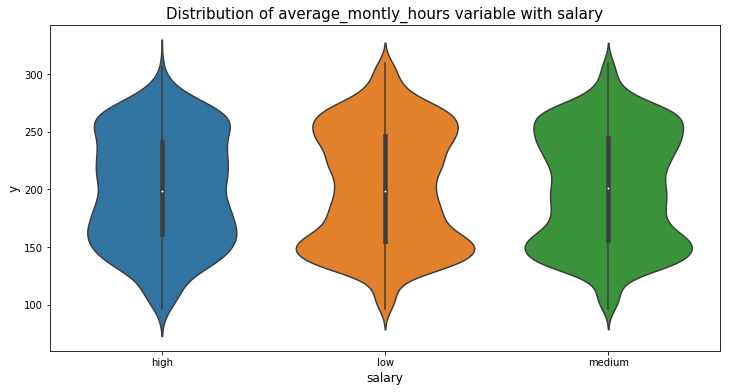

In [73]:
var_name = "salary"
col_order = np.sort(hr_original[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='average_montly_hours', data=hr_original, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of average_montly_hours variable with "+var_name, fontsize=15)
plt.show()

In [3]:
predictions = model.predict(X_test);


In [5]:
mat = sklearn.metrics.confusion_matrix(Y_test,predictions);
score = sklearn.metrics.accuracy_score(Y_test, predictions);
precision = sklearn.metrics.precision_score(Y_test, predictions);
recall = sklearn.metrics.recall_score(Y_test, predictions)

In [7]:
mat

array([[4397,  172],
       [ 278, 1153]])

In [8]:
score


0.925

In [9]:
precision


0.870188679245283

In [10]:
recall

0.8057302585604472